In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta, date

In [2]:
requests = pd.read_csv('../data/hubNashville__311__Service_Requests.csv')
requests.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_44545/1764631690.py:1: DtypeWarning: Columns (10,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  requests = pd.read_csv('../data/hubNashville__311__Service_Requests.csv')


,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,05/04/2022 05:54:30 PM,05/04/2022 05:54:30 PM,Phone,NaN,NaN,...,False,NaN,True,1301 Pilgrim Dr,MADISON,8,37115.0,36.271880,-86.717549,"(36.2718801, -86.7175492)"
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,04/01/2022 09:01:39 PM,04/05/2022 11:29:54 AM,Phone,NaN,NaN,...,False,NaN,False,1237 Tuckahoe Dr,NASHVILLE,3,37207.0,36.257270,-86.763690,"(36.25727, -86.76369)"
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,04/01/2022 09:04:50 PM,04/06/2022 08:14:15 PM,Phone,NaN,NaN,...,False,NaN,False,3613 Wells Ct,ANTIOCH,33,37013.0,36.080968,-86.602406,"(36.080968, -86.602406)"
3,932935,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,04/01/2022 09:01:47 PM,04/01/2022 09:01:47 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,04/01/2022 09:03:10 PM,04/01/2022 10:04:31 PM,Phone,NaN,NaN,...,False,NaN,False,401 Broadway,NASHVILLE,19,37203.0,36.160740,-86.777260,"(36.16074, -86.77726)"


In [3]:
requests['Date / Time Opened'] = requests['Date / Time Opened'].astype('datetime64[ns]')
requests['Date / Time Closed'] = requests['Date / Time Closed'].astype('datetime64[ns]')

<bound method DataFrame.info of          Request #  Status                            Request Type  \
0           966190  Closed  Resolved by hubNashville on First Call   
1           932934  Closed                           Public Safety   
2           932939  Closed               Trash, Recycling & Litter   
3           932935  Closed  Resolved by hubNashville on First Call   
4           932938  Closed                           Public Safety   
...            ...     ...                                     ...   
1076710     525002  Closed              Streets, Roads & Sidewalks   
1076711     523996  Closed              Streets, Roads & Sidewalks   
1076712     522868  Closed               Trash, Recycling & Litter   
1076713     521163  Closed              Streets, Roads & Sidewalks   
1076714     521467  Closed              Streets, Roads & Sidewalks   

                                 Subrequest Type  \
0         Resolved by hubNashville on First Call   
1                      

In [5]:
requests.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04 17:54:30,2022-05-04 17:54:30,Phone,NaN,NaN,...,False,NaN,True,1301 Pilgrim Dr,MADISON,8,37115.0,36.271880,-86.717549,"(36.2718801, -86.7175492)"
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01 21:01:39,2022-04-05 11:29:54,Phone,NaN,NaN,...,False,NaN,False,1237 Tuckahoe Dr,NASHVILLE,3,37207.0,36.257270,-86.763690,"(36.25727, -86.76369)"
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01 21:04:50,2022-04-06 20:14:15,Phone,NaN,NaN,...,False,NaN,False,3613 Wells Ct,ANTIOCH,33,37013.0,36.080968,-86.602406,"(36.080968, -86.602406)"
3,932935,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-04-01 21:01:47,2022-04-01 21:01:47,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:03:10,2022-04-01 22:04:31,Phone,NaN,NaN,...,False,NaN,False,401 Broadway,NASHVILLE,19,37203.0,36.160740,-86.777260,"(36.16074, -86.77726)"


In [7]:
requests['Time to Resolve'] = requests['Date / Time Closed'] - requests['Date / Time Opened']
requests.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,Time to Resolve
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04 17:54:30,2022-05-04 17:54:30,Phone,NaN,NaN,...,NaN,True,1301 Pilgrim Dr,MADISON,8,37115.0,36.271880,-86.717549,"(36.2718801, -86.7175492)",0 days 00:00:00
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01 21:01:39,2022-04-05 11:29:54,Phone,NaN,NaN,...,NaN,False,1237 Tuckahoe Dr,NASHVILLE,3,37207.0,36.257270,-86.763690,"(36.25727, -86.76369)",3 days 14:28:15
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01 21:04:50,2022-04-06 20:14:15,Phone,NaN,NaN,...,NaN,False,3613 Wells Ct,ANTIOCH,33,37013.0,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25
3,932935,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-04-01 21:01:47,2022-04-01 21:01:47,Phone,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:03:10,2022-04-01 22:04:31,Phone,NaN,NaN,...,NaN,False,401 Broadway,NASHVILLE,19,37203.0,36.160740,-86.777260,"(36.16074, -86.77726)",0 days 01:01:21


In [13]:
zip_avg_times = requests.groupby(['ZIP'])['Time to Resolve'].mean().sort_values(ascending=False)
zip_avg_times

ZIP
372515.0             73 days 19:20:00
37238.0              60 days 13:09:34
37015.0    40 days 14:04:01.641025641
37143.0    32 days 17:19:04.193236715
0.0        31 days 14:25:44.136363636
                      ...            
37232                 0 days 16:31:00
38011                 0 days 02:17:00
14210.0               0 days 01:43:00
37243.0               0 days 00:49:41
37246                 0 days 00:00:00
Name: Time to Resolve, Length: 101, dtype: timedelta64[ns]

In [24]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076715 entries, 0 to 1076714
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype          
---  ------                      --------------    -----          
 0   Request #                   1076715 non-null  int64          
 1   Status                      1076715 non-null  object         
 2   Request Type                1076287 non-null  object         
 3   Subrequest Type             1071402 non-null  object         
 4   Additional Subrequest Type  1026917 non-null  object         
 5   Date / Time Opened          1076715 non-null  datetime64[ns] 
 6   Date / Time Closed          1063766 non-null  datetime64[ns] 
 7   Request Origin              1076715 non-null  object         
 8   System of Origin ID         39480 non-null    object         
 9   Contact Type                29999 non-null    object         
 10  Preferred Language          1 non-null        object         
 11  State Issue

In [25]:
requests['ZIP'].value_counts()

37013.0    63658
37211.0    60706
37209.0    54424
37207.0    46221
37206.0    44461
           ...  
38401.0        1
37087.0        1
37129.0        1
38506.0        1
37243.0        1
Name: ZIP, Length: 101, dtype: int64

In [30]:
zip_time_plot['ZIP'] = pd.to_numeric(zip_time_plot['ZIP'])
zip_time_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   ZIP     100 non-null    float64        
 1   0       100 non-null    timedelta64[ns]
dtypes: float64(1), timedelta64[ns](1)
memory usage: 2.3 KB


In [33]:
def zip(requests):
    return requests['Time to Resolve'].mean()
zip_time_plot = requests.groupby(['ZIP']).apply(zip)
zip_time_plot = zip_time_plot.reset_index()
zip_time_plot = zip_time_plot[zip_time_plot.ZIP != 'TN']
zip_time_plot['ZIP'] = pd.to_numeric(zip_time_plot['ZIP'])
zip_time_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   ZIP     100 non-null    float64        
 1   0       100 non-null    timedelta64[ns]
dtypes: float64(1), timedelta64[ns](1)
memory usage: 2.3 KB


TypeError: The DTypes <class 'numpy.dtype[timedelta64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

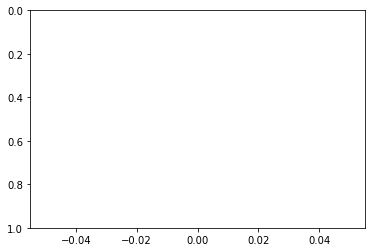

In [37]:
sns.scatterplot(x = 'ZIP', y = 0, data = zip_time_plot);